In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
df = pd.read_csv('data/combine.csv')
df.head()

,artist_id,artist_name,album_id,album_name,genres,followers,popularity,link_image,url,album_type,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,00AFbqxvdDK6T1D6MQZ9c1,GLAY,0rWkjySGI1Ttr4MS7xTQNA,rare collectives vol.4,classic j-pop,590825,56,https://i.scdn.co/image/ab6761610000e5ebc200887e058b56ca63e60ead,https://open.spotify.com/artist/00AFbqxvdDK6T1D6MQZ9c1,album,...,4,-10.697,1,0.0315,0.9520,0.000175,0.104,0.250,74.979,4
1,00AFbqxvdDK6T1D6MQZ9c1,GLAY,0rWkjySGI1Ttr4MS7xTQNA,rare collectives vol.4,j-pop,590825,56,https://i.scdn.co/image/ab6761610000e5ebc200887e058b56ca63e60ead,https://open.spotify.com/artist/00AFbqxvdDK6T1D6MQZ9c1,album,...,4,-10.697,1,0.0315,0.9520,0.000175,0.104,0.250,74.979,4
2,00PLVqZ4oaOmbI4lacLUBO,Stiftelsen,6vYiIkw80Btuehht8d0C8n,Allting låter som Slipknot,classic swedish pop,237999,53,https://i.scdn.co/image/ab6761610000e5eb9fd5de5ba2ae6769e75dc318,https://open.spotify.com/artist/00PLVqZ4oaOmbI4lacLUBO,album,...,0,-6.164,1,0.0476,0.0448,0.000033,0.122,0.330,139.978,4
3,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),art pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,album,...,0,-5.520,1,0.0340,0.1280,0.000002,0.383,0.189,93.763,4
4,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,album,...,0,-5.520,1,0.0340,0.1280,0.000002,0.383,0.189,93.763,4


### Data Preprocessing

1. Drop those columns not affect too much to build the model and extract column 'release_date' to year

In [249]:
df.drop('release_date_precision', axis = 1, inplace= True)

In [250]:
# convert 'release_date' column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# take the year form 'release_date'
df['year'] = df['release_date'].dt.year

In [251]:
df.head()

,artist_id,artist_name,album_id,album_name,genres,followers,popularity,link_image,url,album_type,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,00AFbqxvdDK6T1D6MQZ9c1,GLAY,0rWkjySGI1Ttr4MS7xTQNA,rare collectives vol.4,classic j-pop,590825,56,https://i.scdn.co/image/ab6761610000e5ebc200887e058b56ca63e60ead,https://open.spotify.com/artist/00AFbqxvdDK6T1D6MQZ9c1,album,...,-10.697,1,0.0315,0.9520,0.000175,0.104,0.250,74.979,4,2011
1,00AFbqxvdDK6T1D6MQZ9c1,GLAY,0rWkjySGI1Ttr4MS7xTQNA,rare collectives vol.4,j-pop,590825,56,https://i.scdn.co/image/ab6761610000e5ebc200887e058b56ca63e60ead,https://open.spotify.com/artist/00AFbqxvdDK6T1D6MQZ9c1,album,...,-10.697,1,0.0315,0.9520,0.000175,0.104,0.250,74.979,4,2011
2,00PLVqZ4oaOmbI4lacLUBO,Stiftelsen,6vYiIkw80Btuehht8d0C8n,Allting låter som Slipknot,classic swedish pop,237999,53,https://i.scdn.co/image/ab6761610000e5eb9fd5de5ba2ae6769e75dc318,https://open.spotify.com/artist/00PLVqZ4oaOmbI4lacLUBO,album,...,-6.164,1,0.0476,0.0448,0.000033,0.122,0.330,139.978,4,2017
3,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),art pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,album,...,-5.520,1,0.0340,0.1280,0.000002,0.383,0.189,93.763,4,2012
4,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,album,...,-5.520,1,0.0340,0.1280,0.000002,0.383,0.189,93.763,4,2012


In [252]:
df.drop('release_date', axis = 1, inplace = True)

In [253]:
df.to_csv("final_combine_csv", index_label= False)

2. Check null values in each columns

In [254]:
df.isnull().sum()

# preview column likes the demo of a full song so, we don't need care too much
# with the genre column has a few null values so we will dropna. It will not affect too much to build model
# when we apply in whole dataset, if having many null values, we will handle later

artist_id             0
artist_name           0
album_id              0
album_name            0
genres               13
followers             0
popularity            0
link_image            0
url                   0
album_type            0
total_tracks          0
track_id              0
name                  0
preview             384
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
year                  0
dtype: int64

In [255]:
tracks = df.drop('preview', axis = 1)
tracks.dropna(inplace= True)
tracks.shape

(1120, 26)

Như chúng ta đã biết, có nhiều phiên bản của cùng một bài hát được phát hành, do đó chúng ta cần loại bỏ các phiên bản khác nhau của cùng một bài hát vì chúng ta đang xây dựng một hệ thống đề xuất dựa trên nội dung mà nhân viên chính là hàm tương đồng cosin, hệ thống của chúng ta sẽ đề xuất các phiên bản của cùng một bài hát nếu có và đó không phải là điều chúng ta mong muốn.

As we knew, there are many versions of the same song released so we need to eliminate different versions of the same song because we are building a content based recommender system where the main agent is cosine similarity function, our system will recommend versions of the same song if there are any and that is not what we want

In [256]:
tracks['name'].nunique(), tracks.shape # nunique convert to number instead of string

(536, (1120, 26))

Vậy thì mối quan tâm của chúng tôi đã đúng, hãy xóa các hàng trùng lặp dựa trên tên bài hát.

So the attention of us is correct, let's delete all duplicates columns based on name of song

In [257]:
# arragne the data based on popularity
tracks = tracks.sort_values(by = 'popularity', ascending= False) 

# drop those duplicated names of song, but still keep the first
tracks.drop_duplicates(subset = ['name'], keep = 'first', inplace = True) 

### Building Recommendation System

##### 1/ Recommend songs through name of song

1. Transform music genres to vectorized matrix

Chúng ta sẽ xử dụng kĩ thuật được gọi là Count Vectorizer để chuyển đổi các thể loại nhạc (genres) thành dạng vector số. Ví dụ như 'rock pop' có thể được mã hóa thành vector [1, 1, 0, ...] trong đó mỗi phần tử biểu thị sự hiện diện hoặc tần suất của 1 từ trong từ 

We will use a technique called Count Vectorizer to convert music genres into a vector of numbers. For example 'rock pop' can be encoded as a vector [1, 1, 0, ...] where each element represents the presence or frequency of a word in the word.

In [258]:
tracks.genres.unique()

array(['pop', 'art pop', 'bhojpuri pop', 'j-pop', 'classic j-pop',
       'classic swedish pop', 'cambodian pop', 'classical piano trio'],
      dtype=object)

- Build CountVectorizer to convert music genres

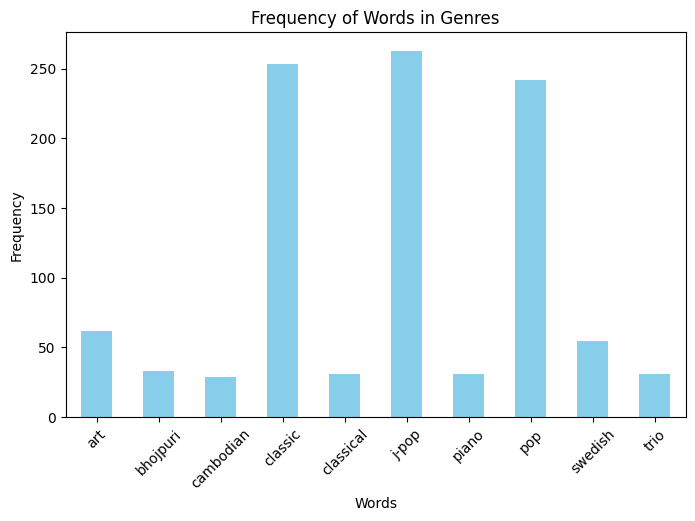

In [259]:
# # step 1: convert all strings to lower case 
# gernes = tracks['genres']
# gernes = [x.lower() for x in gernes]

# # step 2: extract unique words across all genres
# all_words = []

# for g in gernes:
#     all_words.extend(g.split()) # split and extend the list with word
    
# unique_words = np.unique(all_words) # get unique words
    
# # step 3: create a frequency matrix for each document (track's genres)
# frequency_matrix = []

# for g in gernes:
#     word_count = Counter(g.split()) # count word frequency for each track 
#     row = {}
#     for word in unique_words:
#         if word in word_count:
#             row[word] = word_count[word]
#         else:
#             row[word] = 0
#     # row = {word: word_count.get(word, 0) for word in unique_words}
#     frequency_matrix.append(row)

# # convert the frequency matrix into a DataFrame
# frequency_df = pd.DataFrame(frequency_matrix, columns= unique_words).fillna(0)

from collections import Counter

class CountVectorizer:
    def __init__(self):
        self.unique_words = None  # To store the unique words found during fitting

    def fit(self, corpus):
        all_words = []
        for document in corpus:
            all_words.extend(document.lower().split())  # Convert to lowercase and split words
        self.unique_words = np.unique(all_words)  # Extract unique words
        return self

    def transform(self, corpus):
        # if self.unique_words is None:
        #     raise ValueError("CounterVectorizer is not fitted yet. Please call fit() first.")
        
        frequency_matrix = []
        for document in corpus:
            word_count = Counter(document.lower().split())  # Count word frequencies
            row = {}
            for word in self.unique_words:
                if word in word_count:
                    row[word] = word_count[word]
                else:
                    row[word] = 0
            # row = {word: word_count.get(word, 0) for word in self.unique_words}
            frequency_matrix.append(row)
        
        # Convert to DataFrame
        return pd.DataFrame(frequency_matrix, columns=self.unique_words).fillna(0)

    def fit_transform(self, corpus):
        self.fit(corpus)
        return self.transform(corpus)
    
cv = CountVectorizer()

# build vocab
vocab = cv.fit(tracks['genres'])

# transform text to vectorized matrix
vectorized_df = cv.transform(tracks['genres'])

# # plot barplot of frequency of words in genres
word_counts = vectorized_df.sum(axis=0)
word_counts.plot(kind='bar', figsize=(8, 5), color='skyblue')

plt.title('Frequency of Words in Genres')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# According to the plot, most music genres that are listend are related to pop and classic

In [260]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()
# cv.fit(tracks['genres'])

2. Find the similiarities between input song with each song in dataset

Content-based filtering cung cấp các đề xuất được thiết kế riêng bằng cách tập trung vào sở thích cá nhân, sắp xếp hiệu quả các tùy chọn với sở thích và mối quan tâm riêng của từng người dùng. Điều này thường đạt được thông qua các kỹ thuật như cosin similarities, đo lường độ tương đồng giữa vectơ người dùng (đại diện cho sở thích của người dùng) và hồ sơ mục.

Content-based filtering delivers tailored recommendations by focusing on individual preferences, effectively aligning options with each user's unique tastes and interests. This is often achieved through techniques like cosine similarity, which measures the similarity between the user vector (representing the user's preferences) and the item profile.

- Function to normalize by using Min_Max_Scailing method

In [261]:
def min_max_scaler(df):
    min_max_scaler_df = df.copy() # create a copy DataFrame from main df
    
    columns_to_scale = df.select_dtypes(include = ['number'])
    
    for col in columns_to_scale:
        min_val = df[col].min()
        max_val = df[col].max()
        
        # Min-max scaler implement
        min_max_scaler_df[col] = (df[col] - min_val) / (max_val - min_val)
        
    return min_max_scaler_df

In [262]:
tracks_cleaned_name = tracks.drop(['album_id', 'album_type', 'total_tracks', 'track_id', 'mode', 'time_signature', 'year'], axis= 1)

In [275]:
final_df_name = min_max_scaler(tracks_cleaned_name)
final_df_name.sample(10)

,artist_id,artist_name,album_name,genres,followers,popularity,link_image,url,name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
719,00AFbqxvdDK6T1D6MQZ9c1,GLAY,THE FRUSTRATED,classic j-pop,0.014650,0.538462,https://i.scdn.co/image/ab6761610000e5ebc200887e058b56ca63e60ead,https://open.spotify.com/artist/00AFbqxvdDK6T1D6MQZ9c1,STREET LIFE,0.597786,0.720373,1.000000,0.779632,0.005905,0.080076,0.000000,0.067083,0.466117,0.420103
545,001Ju8fxqMbobN0xjX7XPL,Samar Singh,Ganna Ke Ras,bhojpuri pop,0.013839,0.615385,https://i.scdn.co/image/ab6761610000e5ebd329602f4f3465217b054140,https://open.spotify.com/artist/001Ju8fxqMbobN0xjX7XPL,Batawa Ae Gori Hamra Ganna Ke Rass,0.606396,1.000000,0.909091,0.950975,0.291399,0.025879,0.000000,0.244524,0.780104,0.690638
663,00AFbqxvdDK6T1D6MQZ9c1,GLAY,FREEDOM ONLY,j-pop,0.014650,0.538462,https://i.scdn.co/image/ab6761610000e5ebc200887e058b56ca63e60ead,https://open.spotify.com/artist/00AFbqxvdDK6T1D6MQZ9c1,BAD APPLE,0.585486,0.703984,0.000000,0.784472,0.025160,0.026891,0.000000,0.137657,0.436515,0.206561
293,00LY9cN1x8xfhdAa1YJiyw,Gould Piano Trio,"Clarke, Ives & Beach: Piano Trios",classical piano trio,0.000000,0.000000,https://i.scdn.co/image/ab6761610000e5eb83d3efb7cdc5d9335c7d9503,https://open.spotify.com/artist/00LY9cN1x8xfhdAa1YJiyw,"Piano Trio in A Minor, Op. 150: III. Allegro con brio",0.123001,0.171361,0.545455,0.333357,0.066752,0.987866,0.212722,0.039361,0.110900,0.142262
312,00LY9cN1x8xfhdAa1YJiyw,Gould Piano Trio,"Clarke, Ives & Beach: Piano Trios",classical piano trio,0.000000,0.000000,https://i.scdn.co/image/ab6761610000e5eb83d3efb7cdc5d9335c7d9503,https://open.spotify.com/artist/00LY9cN1x8xfhdAa1YJiyw,"Piano Trio in A Minor, Op. 150: Lento espressivo",0.107011,0.057667,0.545455,0.215458,0.033633,0.982811,0.160584,0.076817,0.024210,0.203866
500,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Blue Banisters,art pop,1.000000,1.000000,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,Dealer,0.594096,0.585168,0.000000,0.762028,0.008729,0.321533,0.000173,0.087927,0.372027,0.483441
354,00AFbqxvdDK6T1D6MQZ9c1,GLAY,DRIVE -GLAY complete BEST-,classic j-pop,0.014650,0.538462,https://i.scdn.co/image/ab6761610000e5ebc200887e058b56ca63e60ead,https://open.spotify.com/artist/00AFbqxvdDK6T1D6MQZ9c1,彼女の“Modern…”,0.420664,0.962102,1.000000,0.801690,0.186136,0.001734,0.000000,0.252989,0.559150,0.622192
1039,001Ju8fxqMbobN0xjX7XPL,Samar Singh,Ganna Ke Ras,bhojpuri pop,0.013839,0.615385,https://i.scdn.co/image/ab6761610000e5ebd329602f4f3465217b054140,https://open.spotify.com/artist/001Ju8fxqMbobN0xjX7XPL,Paint Pahirle Badu,0.569496,0.931374,0.636364,0.927304,0.489089,0.272999,0.000000,0.186329,0.948197,0.619573
253,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Honeymoon,pop,1.000000,1.000000,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,Don't Let Me Be Misunderstood,0.255843,0.340367,0.818182,0.616777,0.021053,0.319511,0.000006,0.091101,0.035839,0.140009
862,00AFbqxvdDK6T1D6MQZ9c1,GLAY,G4・2020,classic j-pop,0.014650,0.538462,https://i.scdn.co/image/ab6761610000e5ebc200887e058b56ca63e60ead,https://open.spotify.com/artist/00AFbqxvdDK6T1D6MQZ9c1,Into the Wild - ☆Taku Takahashi Remix,0.596556,0.899621,0.818182,0.871861,0.034403,0.000872,0.000000,0.287906,0.547521,0.517512


- Function to calculate Cosine Similarity

In [264]:
def cosine_similarity(A, B):
    
    # Convert 2D vector to 1D vector for calculating
    A = A.flatten()
    B = B.flatten()
    
    # Calculate dot product (tích vô hướng) of A and B
    dot_product = np.dot(A, B)
    
    # Calculate norm (độ dài) of A and B
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)
    
    # Calculate cosine similarity
    cosine_sim = dot_product / (norm_A * norm_B)
    
    return cosine_sim


- Function to get similarities of each songs based on genres

In [265]:
frequency_df = cv.fit_transform(final_df_name['genres'])

def get_similarities(song_name, data, frequency_df):

    # Ensure indices of frequency_df align with tracks DataFrame
    frequency_df = frequency_df.set_index(data.index)

    # Get genre vector and numeric vector for the input song
    if song_name not in data['name'].values:
        raise ValueError(f"Song '{song_name}' not found in the dataset.")
    
    text_array1 = frequency_df.loc[data['name'] == song_name].to_numpy()
    num_array1 = data.loc[data['name'] == song_name, data.select_dtypes(include=np.number).columns].to_numpy()

    # Store similarity scores for each song
    sim = []
    for idx, row in data.iterrows():
        name = row['name']

        # Get genre vector and numeric vector for the current song
        text_array2 = frequency_df.loc[data['name'] == name].to_numpy()
        num_array2 = data.loc[data['name'] == name, data.select_dtypes(include=np.number).columns].to_numpy()

        # Calculate similarities
        text_sim = cosine_similarity(text_array1, text_array2)
        num_sim = cosine_similarity(num_array1, num_array2)
        sim.append(text_sim + num_sim)

    return sim


3. Build recommendation songs by name of song

In [285]:
# Set display option to show full column values
pd.set_option('display.max_colwidth', None)

def recommend_songs_by_name(song_name, frequency_df, data):
    # Base case: Handle invalid or unpopular songs
    if data[data['name'] == song_name].shape[0] == 0:
        print('This song is either not so popular or you\
        have entered invalid_name.\n Some songs you may like:\n')
        
        for song in data.sample(n=5)['name'].values:
            print(song)
        return
    
    # Calculate similarity factors for all songs
    data['similarity_factor'] = get_similarities(song_name, data, frequency_df)

    # Sort by similarity factor and popularity
    data_sorted = data.sort_values(by=['similarity_factor', 'popularity'],
                                   ascending=[False, False]).copy()

    # Display top 5 songs (excluding the input song itself if needed)    
    print("Recommend songs by name: ")
    display(data_sorted[['artist_name', 'name', 'genres', 'tempo', 'url']].head(5))

In [286]:
recommend_songs_by_name("Dealer", frequency_df, final_df_name)

Recommend songs by name: 


,artist_name,name,genres,tempo,url
500,Lana Del Rey,Dealer,art pop,0.483441,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa
529,Lana Del Rey,Dark Paradise,art pop,0.413883,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa
907,Lana Del Rey,Blue Jeans - Remastered 2011,art pop,0.399653,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa
905,Lana Del Rey,This Is What Makes Us Girls,art pop,0.538204,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa
1075,Lana Del Rey,In My Feelings,art pop,0.205988,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa


##### 2/ Recommend songs through mood and genres 

1. Usinng Standard Scaling to scale

- Function to normalize by using Standard Scaling method

In [277]:
tracks_cleaned_mood = tracks.drop(['album_id', 'album_type', 'total_tracks', 'track_id', 'mode', 'time_signature', 'year'], axis= 1)

In [278]:
def Z_score(df):
    z_score_df = df.copy() # create a copy DataFrame from main df
    
    columns_to_scale = df.select_dtypes(include= ['number'])
    
    for col in columns_to_scale:
        mean_val = df[col].mean()
        std_val = df[col].std()
        
        # Standard deviation implement
        z_score_df[col] = (df[col] - mean_val) / std_val
        
    return z_score_df

z_score_df = Z_score(tracks_cleaned_mood)
z_score_df.head()

,artist_id,artist_name,album_name,genres,followers,popularity,link_image,url,name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
544,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Ultraviolence (Deluxe),pop,1.811472,1.494228,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,West Coast,0.433278,-0.293280,0.247993,-0.094672,-0.416675,-0.345368,-0.194241,-0.713345,0.201794,-0.135065
281,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Lust For Life,pop,1.811472,1.494228,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,13 Beaches,-0.928816,-1.004475,0.519267,-0.402889,-0.474625,0.617263,0.156994,-0.250440,-0.676207,0.525226
296,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Honeymoon,pop,1.811472,1.494228,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,Art Deco,-1.286892,-0.740418,1.604363,-0.818604,-0.168578,0.631214,0.994367,-0.583373,-1.468488,0.655200
525,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Born To Die (Deluxe Version),art pop,1.811472,1.494228,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,Lolita,0.271793,0.942511,-1.379651,0.615824,0.713343,-0.660385,-0.311937,0.876410,-1.100643,0.267475
527,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Born To Die (Deluxe Version),art pop,1.811472,1.494228,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,Diet Mountain Dew,-0.037136,0.030631,1.333089,0.260996,0.479733,-0.099827,-0.312129,1.427030,0.746904,1.515145


2. Using K-means algorithm to catgorize moods based on those important features

In [279]:
from sklearn.cluster import KMeans

# choose related features 
features_scaled = z_score_df[['valence', 'energy', 'danceability', 'acousticness', 'tempo']]

# apply kmeans with 3 clusters (Happy, Sad, Neutral)
kmeans = KMeans(n_clusters= 3, random_state= 42)
z_score_df['mood_score'] = kmeans.fit_predict(features_scaled)

# Name for each cluster
mood_labels = {0: "Neutral", 1: "Happy", 2: "Sad"}
z_score_df['mood'] = z_score_df['mood_score'].map(mood_labels)

In [ ]:
final_df_mood = z_score_df.copy()

,artist_id,artist_name,album_name,genres,followers,popularity,link_image,url,name,danceability,...,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mood_score,mood
544,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Ultraviolence (Deluxe),pop,1.811472,1.494228,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,West Coast,0.433278,...,0.247993,-0.094672,-0.416675,-0.345368,-0.194241,-0.713345,0.201794,-0.135065,0,Neutral
281,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Lust For Life,pop,1.811472,1.494228,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,13 Beaches,-0.928816,...,0.519267,-0.402889,-0.474625,0.617263,0.156994,-0.250440,-0.676207,0.525226,2,Sad
296,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,Honeymoon,pop,1.811472,1.494228,https://i.scdn.co/image/ab6761610000e5ebb99cacf8acd5378206767261,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa,Art Deco,-1.286892,...,1.604363,-0.818604,-0.168578,0.631214,0.994367,-0.583373,-1.468488,0.655200,2,Sad


3. Build recommendation songs by mood and genres

In [292]:
# Set display option to show full column values
pd.set_option('display.max_colwidth', None)

def recommend_music_by_mood(df, mood, num_recommendations= 5):
    
    # Filter the DataFrame by the specified mood
    mood_tracks = df[df['mood'] == mood]
    
    # If fewer tracks are available than requested, return all
    if len(mood_tracks) <= num_recommendations:
        return mood_tracks
    
    # Randomly sample tracks for variety
    recommended_tracks = mood_tracks[['artist_name', 'name', 'genres', 'mood', 'tempo', 'url']].sample(n=num_recommendations, random_state=42)
    
    print("Recommend songs by mood:")
    return recommended_tracks

In [293]:
recommend_music_by_mood(final_df_mood, 'Sad', num_recommendations= 5)

Recommend songs by mood:


,artist_name,name,genres,mood,tempo,url
734,Gould Piano Trio,"Trio, Op. 21: I. Allegro molto",classical piano trio,Sad,-0.918142,https://open.spotify.com/artist/00LY9cN1x8xfhdAa1YJiyw
330,Lana Del Rey,Blue Velvet,art pop,Sad,-1.339012,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa
143,GLAY,幸せになる、その時に。,classic j-pop,Sad,-0.680761,https://open.spotify.com/artist/00AFbqxvdDK6T1D6MQZ9c1
240,Lana Del Rey,Video Games,pop,Sad,-0.169936,https://open.spotify.com/artist/00FQb4jTyendYWaN8pK0wa
1047,Gould Piano Trio,"Piano Trio, A Voyage to Fair Isle",classical piano trio,Sad,-1.365785,https://open.spotify.com/artist/00LY9cN1x8xfhdAa1YJiyw
